# Detection of a Quantum Biscuit with Qiskit

In this Notebook, we describe the process of trying to detect a quantum biscuit in reference to the 'Elitzur–Vaidman bomb tester'.

We decided to switch the 'quantum bomb' to a 'quantum biscuit' due to the current political situation.

Topics:
   1. Initial experiment
   2. Evaluation of an implementation of the quantum biscuit tester by Maria Volaris
   3. Improvements


# 1. Initial Experiment

In the experiment we have a specific area, in which there could be a quantum biscuit.
If even a single photon would touch this biscuit, it would be uneatable.
Simultainously, we want to find out, whether we have in this specific area a biscuit or not.

## Biscuit tester without biscuit

To find out, whether we have a biscuit in the specified area (red rectangle) we first look at the case, where we have no biscuit.

<img src="Images/no_cookie.png" width=400 height=400 />

In this case bring a photon with a beamsplitter (blue object) in a superposition, where the photon takes the way up-right and right-up at the next time.
After being reflected by mirrors (black objects), the both superpositions of the photon are collapsed into a photon object, which goes up.

The color yellow is used for a photon, in case it is a object, light-blue if it is a wave.

Now, we have simulated this in qiskit:

Here q0 represents the photon.

# just a photon with beam splitter

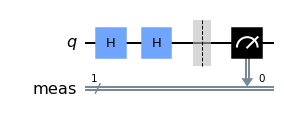

In [1]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
bomb_tester_without_bomb = QuantumCircuit(1)
bomb_tester_without_bomb.h(0)

bomb_tester_without_bomb.h(0)
# bomb_tester_without_bomb.z(0)
bomb_tester_without_bomb.measure_all()
bomb_tester_without_bomb.draw(output='mpl')
# Running the basic bomb tester circuit

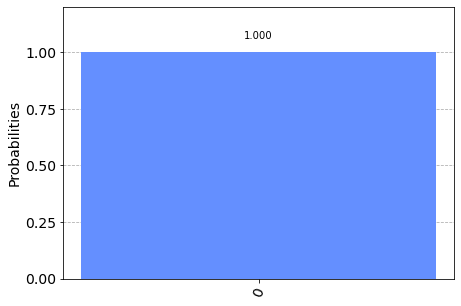

In [2]:
simulator = QasmSimulator()

job = simulator.run(bomb_tester_without_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_without_bomb)


plot_histogram(counts)

# hadamad gates and photon


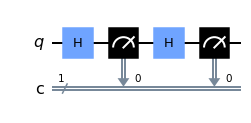

In [3]:
# Code for the basic bomb tester circuit

from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
bomb_tester_with_bomb = QuantumCircuit(qreg_q, creg_c)
bomb_tester_with_bomb.h(0)
bomb_tester_with_bomb.measure(qreg_q[0], creg_c[0])
bomb_tester_with_bomb.h(0)


bomb_tester_with_bomb.measure(qreg_q[0], creg_c[0])
# bomb_tester_with_bomb.measure_all()
bomb_tester_with_bomb.draw(output='mpl')
# Running the basic bomb tester circuit

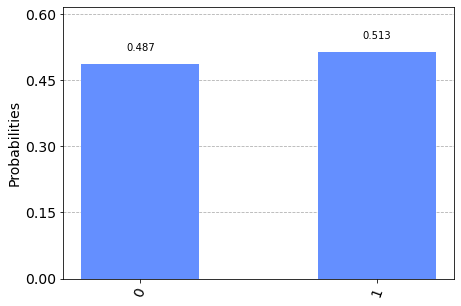

In [4]:
simulator = QasmSimulator()

job = simulator.run(bomb_tester_with_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_with_bomb)


plot_histogram(counts)

# no with two qbits

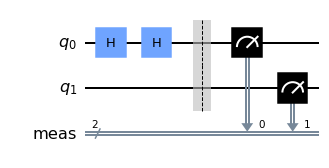

In [5]:

bomb_tester_without_bomb = QuantumCircuit(2)
bomb_tester_without_bomb.h(0)

bomb_tester_without_bomb.h(0)
# bomb_tester_without_bomb.z(0)
bomb_tester_without_bomb.measure_all()
bomb_tester_without_bomb.draw(output='mpl')
# Running the basic bomb tester circuit

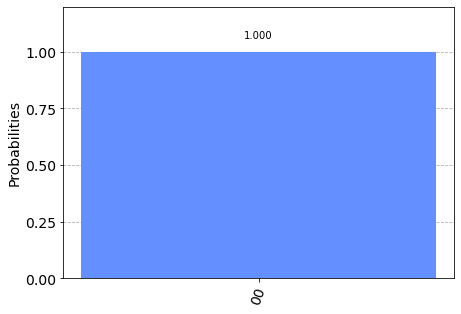

In [6]:
simulator = QasmSimulator()

job = simulator.run(bomb_tester_without_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_without_bomb)


plot_histogram(counts)

We get as result 100% probability for the state $$ |00\rangle $$
This is logical, because we have the inputs $$ |00\rangle $$ of qo and q1 combined.

$$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle $$

## Biscuit tester with biscuit

Now we do the exact same thing, but we put a biscuit in the specified area.

The photon is now in a superposition, until it reached the biscuit.

<img src="Images/Cookie_measurement.png" width=400 height=400 />

When the wave photon reaches the biscuit, there we have a measurement. As a result the superposition of the photon collapses.
The photon either takes the up-right or right-up way.


<img src="Images/Cookie_not_destroyed.png" width=400 height=400 float=left/>
<img src="Images/Cookie_destroyed.png" width=400 height=400 float=right/>

In case the photon goes as a cause of the biscuit measurement the way, in which we have a bomb, the bomb explodes.
Else the photon goes as an object to the second beamsplitter and is then turned into a superposition, which can be measured which the two lightblue event at the black corner.

To represent the existence of a bomb we use as Maria Volaris a cnot gate.

THis is due to the fact, that the cnot
1. measure the state of the photon.
   1. We say that if the photon goes to the state $$ |0\rangle $$ it takes the way, where there is no biscuit. (in our interpretation)
   2. If it is measured to the state $$ |1\rangle $$ it takes the way, where there is the biscuit. (in our interpretation)
2. After the measurement, the cnot gate turns q1 to 1 if q0 is measured one.
In reference to the interpretation of Maria Volaris, the q1 qbit represents whether the bomb has exploded or not.

# Bomb tester with bomb with hadamad gate

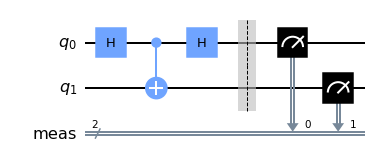

In [7]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

bomb_tester_with_bomb = QuantumCircuit(2)
bomb_tester_with_bomb.h(0)
bomb_tester_with_bomb.cx(0, 1)
bomb_tester_with_bomb.h(0)
# bomb_tester_with_bomb.z(0)
bomb_tester_with_bomb.measure_all()
bomb_tester_with_bomb.draw(output='mpl')

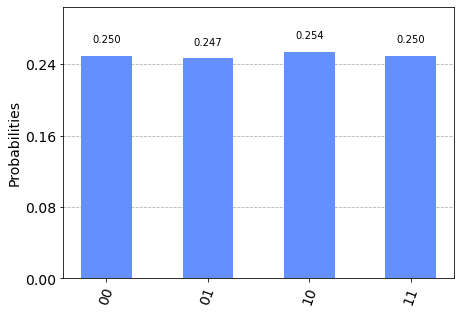

In [8]:
# Running the basic bomb tester circuit
simulator = QasmSimulator()

job = simulator.run(bomb_tester_with_bomb, shots=10000)
result = job.result()
counts = result.get_counts(bomb_tester_with_bomb)


plot_histogram(counts)

The following calcualtion shows, why we have the result.

$$ (H ⨂ I ) CX (H ⨂ I ) |00\rangle = (H ⨂ I ) CX  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = $$

$$(H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

$$ = (H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = (H ⨂ I ) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix}  = (H ⨂ I ) \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix} $$

$$ = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}  = \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$

First of all, we can say, that we have a big difference, in case we have a biscuit or not:

If we have a biscuit, we have the following result:
$$ \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$

If we don't have a biscuit, we have the following result:
$$  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} $$


We can now see a different result, if we have a biscuit or not.

The problem now is, that in 50% of the cases if we have a biscuit, we destroy it.


In [9]:
#!pip3 install qiskit
#!pip3 install pylatexenc
#!pip3 install matplotlib
#!pip3 install RISE

The experiment proposes in the following if no bomb exists

We would have one photon outcome which not in a superposition, so it is either $$ |0\rangle $$ or $$ |1\rangle $$.

But if there is a bomb  we have the CNOT gate. This represents a measurement process in between the Hadamad gates.

So the photon is either $$ |0\rangle $$ or $$ |1\rangle $$ before between the hadamad gates. So we have as a final
We represent the photon as q0. 


# Bomb tester without bomb

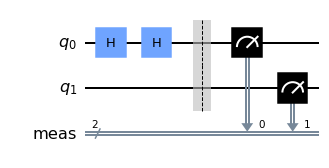

In [10]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

bomb_tester_without_bomb = QuantumCircuit(2)
bomb_tester_without_bomb.h(0)

bomb_tester_without_bomb.h(0)
# bomb_tester_without_bomb.z(0)
bomb_tester_without_bomb.measure_all()
bomb_tester_without_bomb.draw(output='mpl')
# Running the basic bomb tester circuit

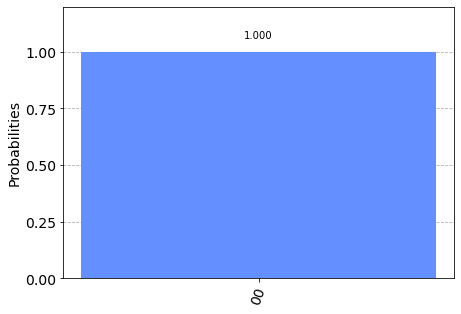

In [11]:
simulator = QasmSimulator()

job = simulator.run(bomb_tester_without_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_without_bomb)


plot_histogram(counts)

Critical analysis of initial experiment:

In an initial implementation of the quantum bomb tester by Maria Violaris, she uses two Qbit. The qubit q0 represents the photon, which is brought to a superposition via a Hadamad Gate.
The qubit q1 represents the bomb.
After that,  she uses a cnot gate, to flip q1 to 1 which means the bomb has exploded.
The state of q0 represents, whether the algorithm thinks, that there does a bomb exist (1) or not (0).

If there would be no quantum bomb, the photon follow the following operation:

$$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle $$

Now we have a bomb which is represented by a CNOT Gate.

$$ (H ⨂ I ) CX (H ⨂ I ) |00\rangle = (H ⨂ I ) CX  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = $$

$$(H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

$$ = (H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = (H ⨂ I ) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix}  = (H ⨂ I ) \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix} $$

$$ = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}  = \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$

The








COMMENT

$$a = H|0\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

Now there are two possibilities,




Critical analysis of initial experiment:

In an initial implementation of the quantum bomb tester by Maria Violaris, she uses two Qbit. The qubit q0 represents the photon, which is brought to a superposition via a Hadamad Gate.
The qubit q1 represents the bomb.
After that,  she uses a cnot gate, to flip q1 to 1 which means the bomb has exploded.
The state of q0 represents, whether the algorithm thinks, that there does a bomb exist (1) or not (0).

If there would be no quantum bomb, the photon follow the following operation:

$$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle$$

Now we have a bomb which is represented by a CNOT Gate.

$$ (H ⨂ I ) CX (H ⨂ I ) |00\rangle = (H ⨂ I ) CX  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = $$

$$(H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

$$ = (H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = (H ⨂ I ) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix}  = (H ⨂ I ) \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix} $$

$$ = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}  = \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$

The








COMMENT

$$a = H|0\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

Now there are two possibilities,




# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')


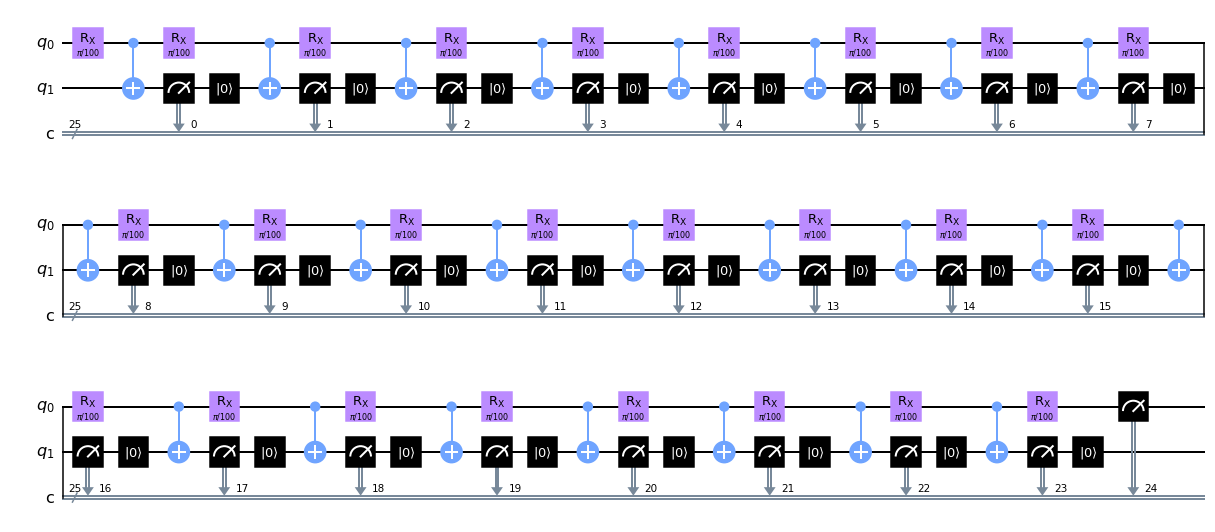

In [12]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate, RYGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 25 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/100 # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')


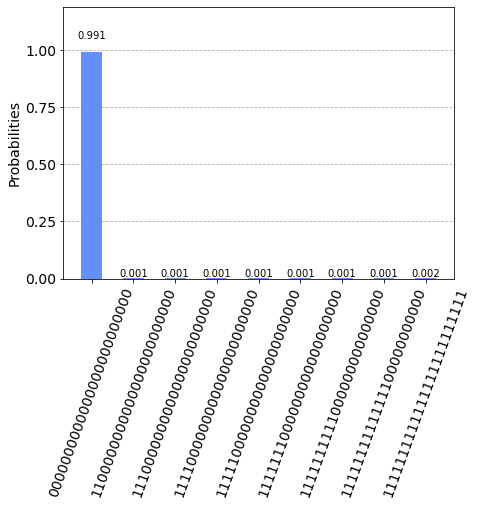

In [13]:
# Running the Zeno bomb tester

zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts)